In [1]:

import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import os
import spacy
import warnings
import sys
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
# Set working directory
os.chdir(r'D:\10academy\Bank-reviews-analysis_W2\Bank-reviews-analysis')
sys.path.append(os.getcwd()) 
from scripts.data_loader import load_data
from scripts.text_preprocessor import preprocess_reviews
from scripts.sentiment_analysis import perform_sentiment_analysis
from scripts.keyword_extraction import extract_keywords, cluster_keywords
from scripts.visualizations import plot_sentiment_distribution, generate_wordcloud
# Suppress warnings
warnings.filterwarnings("ignore")


In [2]:
 # Define the paths for cleaned data
 banks = {
        "CBE": "notebooks/data/cleaned_CBE_reviews.csv",
        "BOA": "notebooks/data/cleaned_BOA_reviews.csv",
        "Dashen": "notebooks/data/cleaned_Dashen_reviews.csv"
    }

In [3]:
  # Load data
bank_dataframes = load_data(banks)

Loaded data for CBE:
                                         review_text  rating        date  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
1                        what is this app problem???       1  2025-06-05   
2       the app is proactive and a good connections.       5  2025-06-05   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05   
4                                               good       4  2025-06-05   

  bank_name       source  
0       CBE  Google Play  
1       CBE  Google Play  
2       CBE  Google Play  
3       CBE  Google Play  
4       CBE  Google Play   

Loaded data for BOA:
                                         review_text  rating        date  \
0                                   it's not working       3  2025-06-05   
1  Hello, I’m facing a problem with the BOA Mobil...       1  2025-06-03   
2                                        exceptional       5  2025-06-03   
3                    this is wore

Sentiment Analysis Results for CBE :
                                     processed_review  sentiment_score  \
0  why atm support account account transfer like ...           0.6369   
1                                        app problem          -0.4019   
2                      app proactive good connection           0.6908   
3                             I send cbebirr app app           0.0000   
4                                               good           0.4404   

  sentiment  
0  positive  
1  negative  
2  positive  
3   neutral  
4  positive   

Top Keywords for CBE: ['access' 'account' 'add' 'allow' 'amazing' 'app' 'application' 'bad'
 'bank' 'banking' 'cbe' 'connection' 'consent' 'convenient' 'corporation'
 'coz' 'crash' 'customer' 'day' 'developer' 'easy' 'excellent'
 'experience' 'fantastic' 'fast' 'feature' 'fix' 'friendly'
 'functionality' 'good' 'great' 'issue' 'it' 'job' 'life' 'like' 'love'
 'make' 'mobile' 'money' 'mpesa' 'need' 'network' 'nice' 'not' 'old'
 'optio

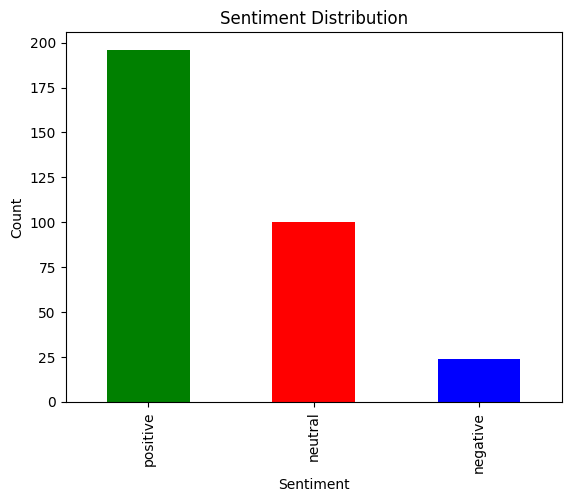

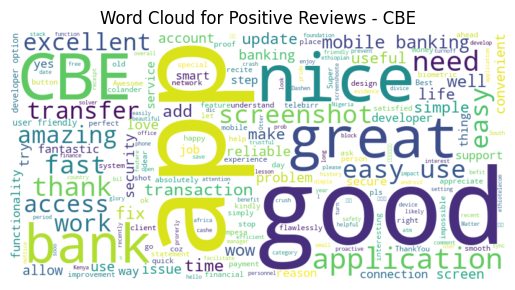

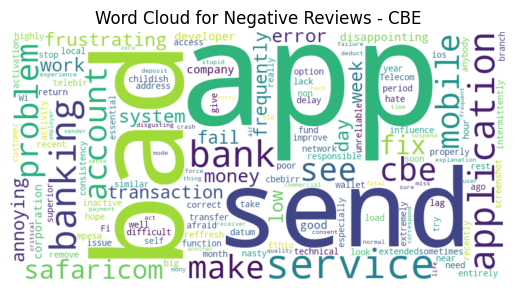

Processed data for CBE saved to CSV.

Sentiment Analysis Results for BOA :
                                     processed_review  sentiment_score  \
0                                               work           0.0000   
1  hello I face problem BOA Mobile app every time...          -0.1027   
2                                        exceptional           0.0000   
3                                    wor app loading           0.0000   
4      this App interest Android phone please update           0.6486   

  sentiment  
0   neutral  
1  negative  
2   neutral  
3   neutral  
4  positive   

Top Keywords for BOA: ['abyssinia' 'access' 'account' 'amazing' 'android' 'app' 'application'
 'ask' 'available' 'bad' 'bank' 'banking' 'big' 'boa' 'bug' 'cbe' 'close'
 'crash' 'customer' 'day' 'developer' 'device' 'difficult' 'download'
 'easy' 'error' 'ethiopia' 'even' 'excellent' 'expect' 'experience' 'fast'
 'feature' 'fix' 'frustrating' 'give' 'go' 'good' 'great' 'have' 'help'
 'horrible' 'h

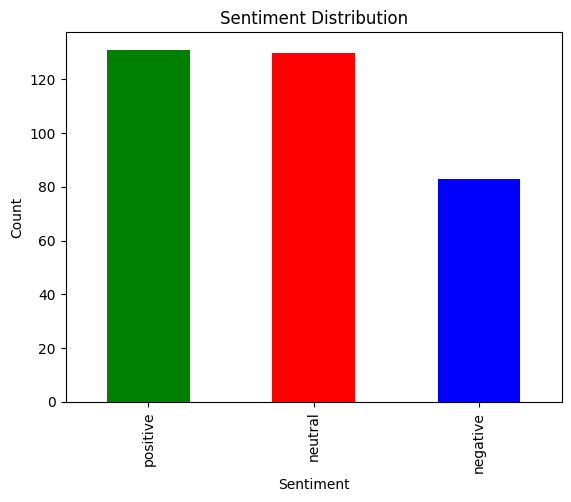

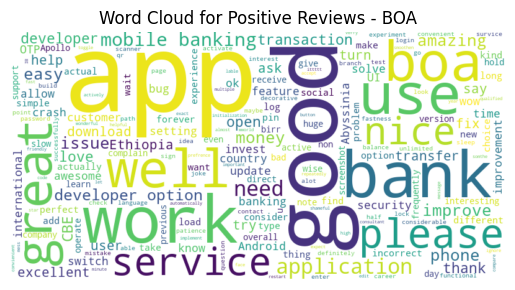

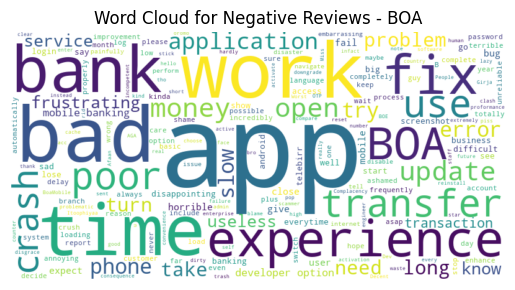

Processed data for BOA saved to CSV.

Sentiment Analysis Results for Dashen :
             processed_review  sentiment_score sentiment
0                       love           0.6369  positive
1                       መቸሸጠ           0.0000   neutral
2                        wow           0.5859  positive
3                      gadaa           0.0000   neutral
4  massive upgrade Amole app           0.0000   neutral 

Top Keywords for Dashen: ['able' 'account' 'add' 'ahead' 'all' 'amazing' 'amole' 'app'
 'application' 'bad' 'balance' 'bank' 'banking' 'bill' 'budget' 'changer'
 'chat' 'commerce' 'convenience' 'convenient' 'customer' 'dashen' 'design'
 'digital' 'easy' 'effortless' 'ethiopia' 'ethiopian' 'excellent'
 'experience' 'fast' 'feature' 'financial' 'friendly' 'game' 'good'
 'great' 'highly' 'incredibly' 'innovation' 'interface' 'intuitive' 'it'
 'keep' 'life' 'like' 'local' 'lot' 'love' 'make' 'manage' 'mobile'
 'money' 'need' 'new' 'nice' 'one' 'option' 'pay' 'payment' 'phone'
 'pl

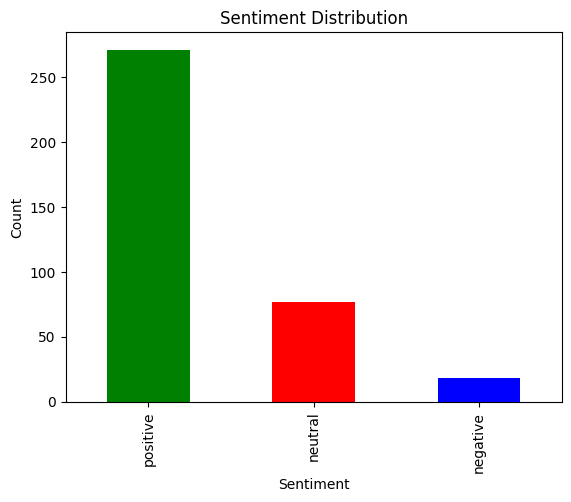

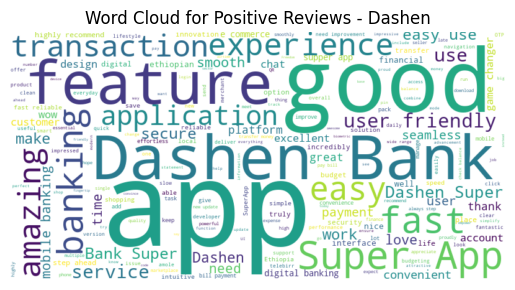

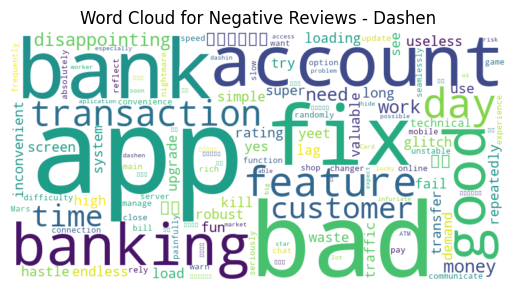

Processed data for Dashen saved to CSV.



In [5]:
for bank_name, df in bank_dataframes.items():
    # Preprocess reviews
    df = preprocess_reviews(df)

    # Perform sentiment analysis
    df = perform_sentiment_analysis(df)

    # Print sentiment analysis results
    print("Sentiment Analysis Results for", bank_name, ":\n", df[['processed_review', 'sentiment_score', 'sentiment']].head(), "\n")

    # Extract keywords
    keywords = extract_keywords(df)
    themes = cluster_keywords(keywords)

    # Print keywords and themes
    print(f"Top Keywords for {bank_name}:", keywords, "\n")
    print("Identified Themes for", bank_name, ":", themes, "\n")

    # Visualizations
    plot_sentiment_distribution(df)

    positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
    negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

    generate_wordcloud(' '.join(positive_reviews), f'Word Cloud for Positive Reviews - {bank_name}')
    generate_wordcloud(' '.join(negative_reviews), f'Word Cloud for Negative Reviews - {bank_name}')

    # Save results
    df.to_csv(f'notebooks/data/processed_reviews_{bank_name}.csv', index=False)
    print(f"Processed data for {bank_name} saved to CSV.\n")